In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('test1_modified_4.csv')
df

,datetime,regular,casual,group,temp,dew,humid,windspeed
0,2017-01-01 00:00:00,63.0,13.0,1.0,-1,-5,75,9
1,2017-01-01 01:00:00,55.0,21.0,0.0,-2,-5,80,9
2,2017-01-01 02:00:00,38.0,19.0,0.0,-3,-7,74,7
3,2017-01-01 03:00:00,22.0,12.0,0.0,-3,-6,80,4
4,2017-01-01 04:00:00,16.0,7.0,0.0,-3,-6,80,7
...,...,...,...,...,...,...,...,...
32098,2021-01-31 19:00:00,1346.0,531.0,13.0,6,0,66,6
32099,2021-01-31 20:00:00,1298.0,589.0,7.0,6,0,66,7
32100,2021-01-31 21:00:00,1229.0,594.0,13.0,6,0,66,9
32101,2021-01-31 22:00:00,750.0,283.0,10.0,6,0,66,9


## 파생변수 생성
- 필요에 따라 Data Understanding 단계에서 진행
- 기존 변수를 조합하여 레이블에 영향을 줄 만한 새로운 변수를 생성
 - ex) 날씨 정보는 외부 활동 패턴에 영향을 미치므로 이를 활용해 파생변수 생성 가능

### 날씨 정보 관련 파생변수 생성
- 바람의 세기(풍속)가 사람의 행동에 제약을 주는 정도를 반영한 파생 변수
- 날씨가 사람의 기분/건강에 미치는 영향을 고려한 파생 변수
 - 너무 더우면 열사병, 너무 추우면 동상의 위험 존재

#### 바람의 세기가 사람의 행동에 주는 영향
- Beaufort wind force scale(보퍼트 풍력계급)
- 바람이 사람의 행동에 영향을 미치게 되는 지점을 5단계 정도로 판단
 - 답이 정해져 있는 것은 아니며, 각 단계에 대한 설명을 참고하여 판단 기준 설정
- 참고 자료: https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=woolalra&logNo=100194954677
 - 웹에서 서치(구글링)하여 적절한 한글/영문 자료 선정
 - 가지고 있는 데이터와 동일한 단위를 사용한 자료를 활용

<AxesSubplot:>

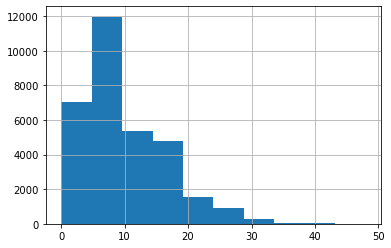

In [3]:
df['windspeed'].hist()

# 히스토그램과 막대그래프의 차이
# 막대 사이의 간격: 히스토그램 x, 막대그래프 o

# y축: 데이터(row)의 수
# x축: 풍속(windspeed) 값
# 6 ~ 9 km/h 정도 바람의 빈도가 가장 높음

In [4]:
# 바람의 영향을 나타내는 windforce 파생변수 생성(기본값: 0)
df['windforce'] = 0

# 바람의 세기가 사람의 행동에 영향을 주기 시작하는 지점(5단계: 29 km/h) 이상이면,
# 바람의 영향(windforce)이 존재한다고 가정 -> df['windforce'] == 1

df.loc[df['windspeed'] >= 29, 'windforce'] = 1
df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce
0,2017-01-01 00:00:00,63.0,13.0,1.0,-1,-5,75,9,0
1,2017-01-01 01:00:00,55.0,21.0,0.0,-2,-5,80,9,0
2,2017-01-01 02:00:00,38.0,19.0,0.0,-3,-7,74,7,0
3,2017-01-01 03:00:00,22.0,12.0,0.0,-3,-6,80,4,0
4,2017-01-01 04:00:00,16.0,7.0,0.0,-3,-6,80,7,0


#### 날씨가 사람의 기분에 미치는 영향
- 불쾌지수(humidex)
 - 기온(temp)과 이슬점(dew)을 활용하여 땀이 증발하지 못하고 남아있는 정도를 측정
- Wikipedia: https://en.wikipedia.org/wiki/Humidex
 - 불쾌지수 표/공식 확인
 - 계산 시 단위 주의

In [5]:
# 불쾌지수 산출 함수 정의(Wikipedia 공식 사용)

def humidex_cal(temp, dew):
    
    e = 2.71828
    exp = 5417.7530 * (1/273.16 - 1/(273.15 + dew)) # exponent
    humidex = temp + 0.5555 * (6.11 * e**exp - 10)
    
    return humidex

In [6]:
humidex_cal(df['temp'], df['dew'])

0       -4.211894
1       -5.211894
2       -6.541948
3       -6.382565
4       -6.382565
           ...   
32098    3.836641
32099    3.836641
32100    3.836641
32101    3.836641
32102    4.091116
Length: 32103, dtype: float64

In [7]:
# 불쾌지수(humidex) 컬럼 생성
df['humidex'] = humidex_cal(df['temp'], df['dew'])
df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex
0,2017-01-01 00:00:00,63.0,13.0,1.0,-1,-5,75,9,0,-4.211894
1,2017-01-01 01:00:00,55.0,21.0,0.0,-2,-5,80,9,0,-5.211894
2,2017-01-01 02:00:00,38.0,19.0,0.0,-3,-7,74,7,0,-6.541948
3,2017-01-01 03:00:00,22.0,12.0,0.0,-3,-6,80,4,0,-6.382565
4,2017-01-01 04:00:00,16.0,7.0,0.0,-3,-6,80,7,0,-6.382565


In [8]:
# 날씨가 사람의 기분에 미치는 영향 -> discomfort 파생변수 생성(기본값: 0)
df['discomfort'] = 0

# Wikipedia 참고하여 discomfort 값을 설정
df.loc[df['humidex'] >= 30, 'discomfort'] = 1
df.loc[df['humidex'] >= 40, 'discomfort'] = 2
df.loc[df['humidex'] >= 46, 'discomfort'] = 3

df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort
0,2017-01-01 00:00:00,63.0,13.0,1.0,-1,-5,75,9,0,-4.211894,0
1,2017-01-01 01:00:00,55.0,21.0,0.0,-2,-5,80,9,0,-5.211894,0
2,2017-01-01 02:00:00,38.0,19.0,0.0,-3,-7,74,7,0,-6.541948,0
3,2017-01-01 03:00:00,22.0,12.0,0.0,-3,-6,80,4,0,-6.382565,0
4,2017-01-01 04:00:00,16.0,7.0,0.0,-3,-6,80,7,0,-6.382565,0


#### 날씨가 사람의 건강에 미치는 영향
- 여름: 열사병(Heat index, 열 지수)
 - Wikipedia: https://en.wikipedia.org/wiki/Heat_index
 - 열 지수 표/공식 확인
 - temp, humid 변수 사용
- 겨울: 동상(Wind chill, 체감 추위)
 - Wikipedia: https://en.wikipedia.org/wiki/Wind_chill
 - 체감 추위 표/공식 확인
 - temp, windspeed 변수 사용

In [9]:
 # 위 자료를 참고하여 windforce, discomfort와 유사한 형식의 파생변수 생성 가능

### Datetime Handling
- datetime(연-월-일 시:분:초)
 - 연, 월, 일, 시간, 요일 정보로 분할하여 표현

In [10]:
df['datetime'] # object 형태

0        2017-01-01 00:00:00
1        2017-01-01 01:00:00
2        2017-01-01 02:00:00
3        2017-01-01 03:00:00
4        2017-01-01 04:00:00
                ...         
32098    2021-01-31 19:00:00
32099    2021-01-31 20:00:00
32100    2021-01-31 21:00:00
32101    2021-01-31 22:00:00
32102    2021-01-31 23:00:00
Name: datetime, Length: 32103, dtype: object

In [11]:
# datetime 데이터 변환(object -> datetime)
parsed = df['datetime'].apply(lambda x: pd.to_datetime(x))
parsed

0       2017-01-01 00:00:00
1       2017-01-01 01:00:00
2       2017-01-01 02:00:00
3       2017-01-01 03:00:00
4       2017-01-01 04:00:00
                ...        
32098   2021-01-31 19:00:00
32099   2021-01-31 20:00:00
32100   2021-01-31 21:00:00
32101   2021-01-31 22:00:00
32102   2021-01-31 23:00:00
Name: datetime, Length: 32103, dtype: datetime64[ns]

In [12]:
# datetime 정보를 분리하여 저장한 컬럼 생성
df['year'] = parsed.apply(lambda x: x.year)
df['month'] = parsed.apply(lambda x: x.month)
df['day'] = parsed.apply(lambda x: x.day)
df['hour'] = parsed.apply(lambda x: x.hour)
df['dayofweek'] = parsed.apply(lambda x: x.dayofweek)
df.head()

,datetime,regular,casual,group,temp,dew,humid,windspeed,windforce,humidex,discomfort,year,month,day,hour,dayofweek
0,2017-01-01 00:00:00,63.0,13.0,1.0,-1,-5,75,9,0,-4.211894,0,2017,1,1,0,6
1,2017-01-01 01:00:00,55.0,21.0,0.0,-2,-5,80,9,0,-5.211894,0,2017,1,1,1,6
2,2017-01-01 02:00:00,38.0,19.0,0.0,-3,-7,74,7,0,-6.541948,0,2017,1,1,2,6
3,2017-01-01 03:00:00,22.0,12.0,0.0,-3,-6,80,4,0,-6.382565,0,2017,1,1,3,6
4,2017-01-01 04:00:00,16.0,7.0,0.0,-3,-6,80,7,0,-6.382565,0,2017,1,1,4,6


In [13]:
df.columns

Index(['datetime', 'regular', 'casual', 'group', 'temp', 'dew', 'humid',
       'windspeed', 'windforce', 'humidex', 'discomfort', 'year', 'month',
       'day', 'hour', 'dayofweek'],
      dtype='object')

In [14]:
selected_features = ['datetime', 'regular', 'casual', 'group', 'temp', 'dew', 'humid',
                     'windspeed', 'windforce', 'humidex', 'discomfort', 'year', 'month',
                     'day', 'hour', 'dayofweek']

# 파생변수가 포함된 modified_5 파일 생성
df[selected_features].to_csv('test1_modified_5.csv', index=False)

## 유용한 데이터 분석 패키지/도구
- bayesian-optimization: 하이퍼파라미터 튜닝(hyperparameter tuning) 도구
- pandas_profiling: 데이터 이해(data understanding) 단계를 쉽게 진행할 수 있도록 도와주는 도구
 - 기계적으로 데이터를 어느 정도 분석하여 보고서 형식으로 제공
- xgboost: boosting 계열의 알고리즘
 - 병렬 연산 처리가 불가능해 속도가 느린 boosting 계열 알고리즘의 속도를 개선
- shap: XAI(해석력을 높이기 위한 시도)와 관련된 도구
 - 시간이 오래 소요되지만 XAI 활용 자체에 이점이 분명히 존재
 - 머신러닝 실무에서 많이 사용되는 도구

In [15]:
# !pip install bayesian-optimization
# !pip install pandas_profiling
# !pip install xgboost
# !pip install shap

# 설치 시에 문제(권한 오류 등)가 발생할 경우 jupyter notebook 서버 종료 후,
# anaconda prompt에서 관리자 권한으로 설치 진행

# 설치 후 jupyter notebook 실행이 안되면 anaconda navigator에서 버전 업데이트 후 재실행

#### pandas_profiling
- Data Understanding 단계의 Easy Solution
- 변수별 기초통계량, 분포, 변수 간 관계를 기계적으로 분석하여 제공
 - 머신러닝을 활용하거나 도메인 지식을 갖춘 상태로 분석하는 것은 아니지만, 기계적인 분석만으로도 활용도가 높음
 - 꼭 인지하고 넘어가야 할 부분이 있다면 어느 정도 인사이트 제공

In [16]:
import pandas_profiling as pp
import pandas as pd

In [17]:
df = pd.read_csv('test1_modified_5.csv')

In [18]:
# pandas profiling report 생성
report = pp.ProfileReport(df)
report.to_file('test1_report.html') # to_html 있지만, to_file 확장자 지정하여 간단하게 사용 가능

# 보고서 html 파일이 생성된 것 확인
# 내용이 직관적으로 표현되어 있어서 자주 사용되는 모듈

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
##### pandas profiling report 파일 해석(test1_report.html) #####

# 1) Overview: 전반적인 요약

# 2) Alerts:주로 보게 되는 탭

# duplicate rows
# 0.7% 수준으로 중복된 행(데이터) 존재 -> 민감하게 받아들일 수준 x
# 날씨 정보의 일부를 잘라서 추출했기 때문에 중복이 발생한 것으로 유추

# High cardinality: primary key(행과 행을 구분하는 식별 인자) 많이 존재
# 전체 행 대비 튜플/데이터 경우의 수가 많은 datetime -> 모든 일자별 데이터를 가지고 있으므로

# correlation
# regular is highly correlated with casual -> regular 높아지거나 낮아질 때 casual 함께 변동
# 도메인 지식 없이 기계적인 분석만 진행 -> 관련 없는 컬럼 간 High correlation 보이는 경우도 존재

# Zeros
# 데이터에 존재하는 0의 개수/비율
# 0의 개수가 많다고 해서 항상 문제가 되는 것은 x
# 0 값이 그 자체로 의미를 가지는 경우 -> dayofweek: 요일을 0~6의 숫자로 표현

In [20]:
##### 주의하여 살펴볼 부분 #####

# duplicate rows
# cardinality: 경우의 수가 많지 않은 컬럼이 High cardinality 보이면 의심 필요
# correlation: 관련 없어 보이는 컬럼들이 높은 상관관계를 보이면 데이터 처리 작업 필요
# zeros